In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import os
import json
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Gathering 3 files and load it :

In [2]:
#1st file_jason file.
with open('tweet-json.txt') as file:
    df_api = pd.read_json(file, lines=True, encoding='utf-8')
    
df_api = pd.DataFrame(df_api)    
df_api_clean = df_api.copy()

In [3]:
#2nd_file archive file.
df_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_arch_clean = df_arch.copy()

In [4]:
#3rd_file image predection.
df_img = pd.read_csv('image-predictions.tsv', sep='\t')
df_img_clean = df_img.copy()

## Assess :
- df_api_clean
- df_img_clean
- df_arch_clean

# Asses 

In [5]:
df_arch_clean.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He is not a fan of the pupporazz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884...,12,10,Duke,None,None,None,None
1479,693582294167244802,6.935722e+17,1.198989e+09,2016-01-30 23:51:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Personally I'd give him an 11/10. Not sure why...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
938,753294487569522689,NaN,NaN,2016-07-13 18:26:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ace. He's a window washer. One of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753294487...,11,10,Ace,None,None,None,None
971,750101899009982464,NaN,NaN,2016-07-04 23:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lilah. She agreed on one quick pic. Now s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750101899...,11,10,Lilah,None,None,None,None


In [6]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
df_arch_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [8]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [9]:
df_img_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [10]:
df_api_clean.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
763,2016-09-19 19:31:59+00:00,777953400541634568,777953400541634560,RT @dog_rates: Meet Gerald. He's a fairly exot...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,4080,0,False,False,NaN,NaN,en,{'created_at': 'Tue Aug 23 21:09:14 +0000 2016...,NaN,NaN,NaN
1980,2015-12-05 02:37:35+00:00,672968025906282496,672968025906282496,This is Gustaf. He's a purebred Chevy Equinox....,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672968020474638337, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,602,1405,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1861,2015-12-11 17:51:04+00:00,675372240448454658,675372240448454656,"The tail alone is 13/10. Great dog, better own...",False,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675372232026292224, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,563,1838,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
355,2017-02-12 01:04:29+00:00,830583320585068544,830583320585068544,This is Lilly. She just parallel barked. Kindl...,False,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,19297,73397,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1719,2015-12-24 21:00:12+00:00,680130881361686529,680130881361686528,This is Reggie. His Santa hat is a little big....,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 680130874835337216, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1078,2519,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [11]:
df_img_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


## OBESERVATIONS
### Qulatiy:
- most of in_reply_to_status column & .in_reply_to_user_id are empty
- retweets are present in the data
- some of the column names are not  meaningful "source , text"
- "source" values are formatted as in html 
-  the dog nick names needs arrangement in one column .
- timestamp change to to_datetime
- dog_stage column have of wrong names
- "name" column have alot mistaken names
- source column isnt readable
- clean columns from faulty and uncorrect data
- faulty tweets not related to dogs
- remove confusing chracteres from all columns


## Tidiness

- img_num useless.
- Just 3 columns needed id, retweet_count, favorite_count
- All datasets should be combined into 1 dataset only
- "retweeted_status_timestamp"  is useless.
- id column isnt matching other columns key refrence column tweet_id.
- drop unnessery columns
- decrease decimels


## Define 
- we only need 3 columns id, retweet count, favorite count "drop"
- change id column to tweet_it to match other tables
- drop unessery columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.
- rename  test column to comment
- clean columns from faulty and uncorrect data and replace faulty data with empty string

- strip source column url
- change source label to url
- combine doggo/ floofer /pupper /puppo in one column and delete the same
- change time stamp to_datetime
- lower name columns content
- remove confusing charaters from all columns
- merge all tables in one master table
- decrease decimels 
- Save cleaning process
- Creat a rating percentage column to help me in data fileration

## Clean 

In [12]:
df_api_clean = df_api_clean[['id','retweet_count', 'favorite_count']]
df_api_clean.rename(columns = {'id' : 'tweet_id'}, inplace=True )

In [13]:
# Drop unnessery columns
df_arch_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [14]:
#rename  test column to comment
df_arch_clean.rename(columns={'text' : 'comments'}, inplace=True)

In [15]:
#removing None from df_arch_clean column 
df_arch_clean.iloc[:, -4:  ] = df_arch_clean.iloc[:, -4:  ].replace('None','')
#test
df_arch_clean[df_arch_clean['doggo'] == 'doggo' ]

,tweet_id,timestamp,source,comments,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,
43,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,,,
99,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,,,
108,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,,,
110,871102520638267392,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,,,
121,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,,,
172,858843525470990336,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,,,
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,,,puppo
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,,
211,851953902622658560,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,,,


In [16]:
#change timestamp column to date type
df_arch_clean.timestamp = pd.to_datetime(df_arch_clean.timestamp).dt.date

In [17]:
# merge dog stages to one stage column
df_arch_clean['dog_stage'] = df_arch_clean.doggo + df_arch_clean.floofer + df_arch_clean.pupper + df_arch_clean.puppo


In [18]:
#delete stages columns
df_arch_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [19]:
# extract url from source column
df_arch_clean['text_url'] = df_arch_clean.source.str.extract('(".*" )', expand= True)
#drop source column
df_arch_clean.drop(columns=['source'], inplace=True)

In [20]:
#lower name columns content
df_arch_clean.name = df_arch_clean.name.str.lower()

In [21]:
# faulty tweets not related to dogs

df_img_clean.drop(df_img_clean[(df_img_clean["p1_dog"] == False) & (df_img_clean["p2_dog"] == False) & (df_img_clean['p3_dog'] == False)].index, inplace=True)
#test
df_img_clean[(df_img_clean["p1_dog"] == False) & (df_img_clean["p2_dog"] == False) & (df_img_clean['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [22]:
# Delete img_num column
df_img_clean.drop('img_num', axis=1, inplace=True)


In [23]:
# Lower content 
df_img_clean['p1'] = df_img_clean['p1'].str.lower()
df_img_clean['p2'] = df_img_clean['p2'].str.lower()
df_img_clean['p3'] = df_img_clean['p3'].str.lower()


In [24]:
# replace unnessery characters
df_img_clean.p1 = df_img_clean.p1.str.replace( '_',' ')
df_img_clean.p2 = df_img_clean.p2.str.replace( '_',' ')
df_img_clean.p3 = df_img_clean.p3.str.replace( '_',' ')

In [25]:
# start merging tables
df_master = df_arch_clean.merge(df_api_clean, on='tweet_id', how='inner')

In [26]:
# merge rest of the columns
df_master = df_master.merge(df_img_clean, on='tweet_id', how='inner')

In [27]:
#decrease the decimel
df_master[['p1_conf','p2_conf','p3_conf']] = df_master[['p1_conf','p2_conf','p3_conf']].round(2)

# TESTING

In [28]:
#combined testing codes used accodingly one by one merged in one cell to save space
# Testing df_arch_clean DF
df_arch_clean.info()
df_arch_clean.count()
df_arch_clean.isnull().sum()
df_arch_clean.tweet_id.duplicated().sum()
df_arch_clean.rating_denominator.sample(5)
df_arch_clean.sample(5)
df_arch_clean[df_arch_clean.dog_stage == 'doggopuppo' ].head(4)
df_arch_clean.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   comments            2356 non-null   object
 3   expanded_urls       2297 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   dog_stage           2356 non-null   object
 8   text_url            2356 non-null   object
dtypes: int64(3), object(6)
memory usage: 165.8+ KB


,tweet_id,timestamp,comments,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,text_url
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,,"""http://twitter.com/download/iphone"""
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,,"""http://twitter.com/download/iphone"""
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,archie,,"""http://twitter.com/download/iphone"""
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,darla,,"""http://twitter.com/download/iphone"""


In [29]:
# Testing df_api_clean DF
df_api_clean.sample(4)

,tweet_id,retweet_count,favorite_count
2062,671154572044468225,241,769
613,796759840936919040,3562,13256
576,800855607700029440,1889,0
1235,712309440758808576,26,269


In [30]:
#Testing df_img_clean DF
df_img_clean
df_img_clean[df_img_clean.p1_dog == False]
df_img_clean[(df_img_clean["p1_dog"] != False) & (df_img_clean["p2_dog"] != False) & (df_img_clean['p3_dog'] != False)]
df_img_clean.info()
df_img_clean.sample(10)
df_img_clean.p3_conf.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   p1        1751 non-null   object 
 3   p1_conf   1751 non-null   float64
 4   p1_dog    1751 non-null   bool   
 5   p2        1751 non-null   object 
 6   p2_conf   1751 non-null   float64
 7   p2_dog    1751 non-null   bool   
 8   p3        1751 non-null   object 
 9   p3_conf   1751 non-null   float64
 10  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 128.2+ KB


count    1.751000e+03
mean     6.161188e-02
std      5.192022e-02
min      2.160900e-07
25%      1.608055e-02
50%      5.000780e-02
75%      9.480810e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [31]:
#Save cleaning process
df_master.to_csv('twitter_archive_master.csv', index = False)

In [32]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [33]:
df_master_clean = df_master.copy()

In [34]:
list_cols = df_master_clean.columns

In [35]:
#Testing df_master_clean DF
df_master_clean.name.value_counts()
df_master_clean.name.loc[ (df_master_clean.name.str.len() < 2) & (df_master_clean.name.values == '')]
df_master_clean
df_master[['p1_conf','p2_conf','p3_conf']]
df_master_clean.describe()
df_master_clean.sample(2)
df_master_clean.rating_numerator.value_counts()


12     445
11     370
10     367
13     247
9      133
8       68
7       32
14      26
6       16
5       14
4        7
3        5
2        2
165      1
1        1
24       1
144      1
26       1
27       1
44       1
45       1
50       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
143      1
0        1
Name: rating_numerator, dtype: int64

In [36]:
#rearrange columns 
df_master_clean = df_master_clean[['name', 'rating_numerator',  'dog_stage', 'comments', 'retweet_count', 'favorite_count','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
'p3_dog', 'expanded_urls', 'text_url',  'jpg_url',  'timestamp', 'rating_denominator', 'tweet_id']]

In [37]:
#clean and remove columns from faulty data
df_master_clean.name = df_master_clean.name.str.replace('none', '')
df_master_clean.name = df_master_clean.name.str.replace('a', '')

In [38]:
#clean na data
df_master_clean.dog_stage.fillna('', inplace=True)

In [39]:
#sort by rating
df_master_clean.sort_values('rating_numerator', ascending=False)

,name,rating_numerator,dog_stage,comments,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,expanded_urls,text_url,jpg_url,timestamp,rating_denominator,tweet_id
652,,165,,Why does this never happen at my front door......,2539,5316,labrador retriever,0.44,True,chihuahua,0.11,True,american staffordshire terrier,0.10,True,https://twitter.com/dog_rates/status/758467244...,"""http://twitter.com/download/iphone""",https://pbs.twimg.com/ext_tw_video_thumb/75846...,2016-07-28,150,758467244762497024
1317,,144,,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,1104,3323,teddy,0.66,False,crib,0.03,False,chow,0.03,True,https://twitter.com/dog_rates/status/677716515...,"""http://twitter.com/download/iphone""",https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,2015-12-18,120,677716515794329600
1208,,143,,"Two sneaky puppers were not initially seen, mo...",239,1369,golden retriever,0.20,True,samoyed,0.07,True,great pyrenees,0.07,True,https://twitter.com/dog_rates/status/684225744...,"""http://twitter.com/download/iphone""",https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2016-01-05,130,684225744407494656
1209,,121,,Someone help the girl is being mugged. Several...,1563,4225,soft-coated wheaten terrier,0.79,True,cocker spaniel,0.07,True,teddy,0.07,False,https://twitter.com/dog_rates/status/684222868...,"""http://twitter.com/download/iphone""",https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,2016-01-05,110,684222868335505415
902,,99,,Happy Saturday here's 9 puppers on a bench. 99...,829,3062,golden retriever,0.37,True,cocker spaniel,0.18,True,irish setter,0.09,True,https://twitter.com/dog_rates/status/713900603...,"""http://twitter.com/download/iphone""",https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,2016-03-27,90,713900603437621249
1367,,88,,Here we have an entire platoon of puppers. Tot...,1460,2927,labrador retriever,0.87,True,golden retriever,0.04,True,vizsla,0.03,True,https://twitter.com/dog_rates/status/675853064...,"""http://twitter.com/download/iphone""",https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,2015-12-13,80,675853064436391936
306,,84,,The floofs have been released I repeat the flo...,3716,13518,west highland white terrier,0.87,True,kuvasz,0.06,True,samoyed,0.04,True,https://twitter.com/dog_rates/status/820690176...,"""http://twitter.com/download/iphone""",https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2017-01-15,70,820690176645140481
922,,80,,Here's a brigade of puppers. All look very pre...,636,2529,soft-coated wheaten terrier,0.95,True,dandie dinmont,0.02,True,cairn,0.02,True,https://twitter.com/dog_rates/status/710658690...,"""http://twitter.com/download/iphone""",https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,2016-03-18,80,710658690886586372
498,logn,75,,"This is Logan, the Chow who lived. He solemnly...",7069,20296,pomeranian,0.47,True,persian cat,0.12,False,chow,0.10,True,https://twitter.com/dog_rates/status/786709082...,"""http://twitter.com/download/iphone""",https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,2016-10-13,10,786709082849828864
999,,60,,Here is a whole flock of puppers. 60/50 I'll ...,1028,3201,great pyrenees,0.67,True,kuvasz,0.23,True,golden retriever,0.04,True,https://twitter.com/dog_rates/status/704054845...,"""http://twitter.com/download/iphone""",https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,2016-02-28,50,704054845121142784


In [40]:
#creat a rating percentage column
df_master_clean['rate'] = df_master_clean.rating_numerator / df_master_clean.rating_denominator

#rearrange columns 
df_master_clean = df_master_clean[['name', 'rate', 'rating_numerator', 'dog_stage', 'comments', 'retweet_count',
       'favorite_count', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
       'p3', 'p3_conf', 'p3_dog', 'expanded_urls', 'text_url', 'jpg_url',
       'timestamp', 'rating_denominator', 'tweet_id']].sort_values('rate', ascending=False)


# PREPARING DATA FOR VISULASTION

In [41]:
short_name = df_master_clean.name.loc[(df_master_clean.name.str.len() < 2) & (df_master_clean.name.values != '')]
short_name = list(short_name)
short_name

['j', 'v', 'l', 'o', 'n', 'n', 'n', 'n']

In [42]:
df_master_clean.name.loc[(df_master_clean.name.str.len() < 2) & (df_master_clean.name.values != '')]

60      j
1419    v
592     l
558     o
1632    n
1731    n
741     n
1732    n
Name: name, dtype: object

In [43]:
for index, row in df_master_clean.iterrows(): 
    #print(df_master_clean.loc[index,'name'])
    if (len(row['name']) < 2)  :        
        df_master_clean.loc[index,'name'] = np.nan

In [44]:
df_master_clean.loc[ df_master_clean.dog_stage == '','dog_stage'] = np.nan

In [45]:

df_master_clean.timestamp = pd.to_datetime(df_master_clean.timestamp)

In [46]:
tb = df_master_clean.groupby(df_master_clean.dog_stage)['rate']


# VISUALSATION 

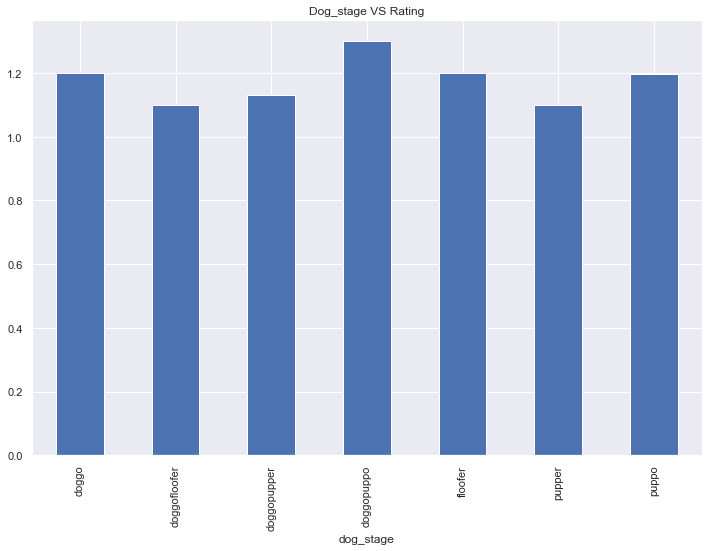

In [47]:
# Average rating vs dog stage
tb_1=df_master_clean.groupby('dog_stage')['rate'].mean()
plt.subplots(figsize=(12, 8))
tb_1.plot(kind='bar', title='Dog_stage VS Rating');

# Insight - 1
- doggopuppo got the hightest among dog stages

In [48]:
#rating Vs name
df_master_clean.name.value_counts(sort=True, ascending=False)
df_master_clean.groupby('name').count().tweet_id
highest_10_names = df_master_clean.name.value_counts(sort=True, ascending=False)[:10]
dict(highest_10_names)
listy = []
for x  in highest_10_names.keys():
    listy.append(x)
listy

['chrlie',
 'tucker',
 'cooper',
 'lucy',
 'penny',
 'oliver',
 'winston',
 'sdie',
 'bo',
 'the']

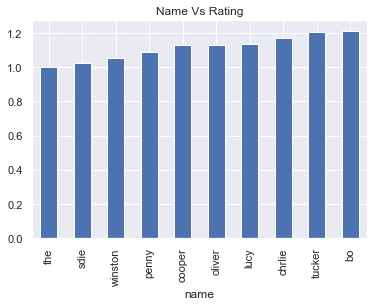

In [49]:
df_1 = pd.DataFrame()
for x in listy:
    df_1 = df_1.append(df_master_clean[df_master_clean.name == x])

df_1.groupby('name').mean()['rate'].sort_values().plot(kind='bar', title='Name Vs Rating');


# Insight - 2
- Tucker dog name got the highest rating between all names

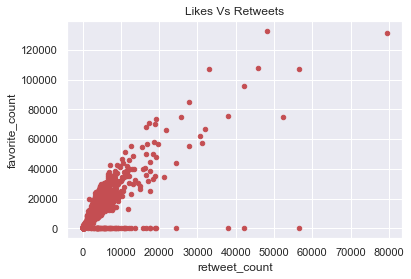

In [50]:
# Retweet VS Likes
df_master_clean.plot(x='retweet_count',y='favorite_count',kind='scatter', color='r', title='Likes Vs Retweets');

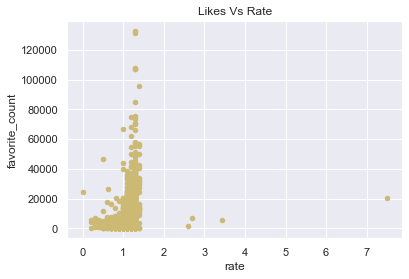

In [51]:
# Rate Vs Likes
df_master_clean.plot(x='rate',y='favorite_count',kind='scatter', color='y', title='Likes Vs Rate');

In [52]:
df_stages = df_master_clean[df_master_clean.dog_stage.isnull() == False]
df_favorite_vs_stages = pd.DataFrame(df_stages.groupby('dog_stage').favorite_count.mean().sort_values())
df_favorite_vs_stages['dog_stage'] = df_favorite_vs_stages.index

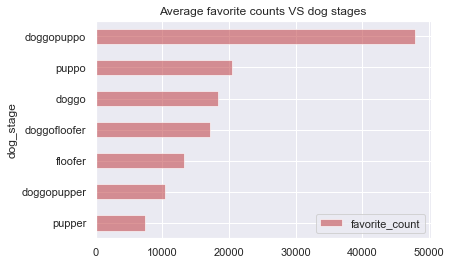

In [53]:
#Average favorite counts VS dog stages
df_favorite_vs_stages.plot(kind='barh', x = 'dog_stage', y = 'favorite_count', title="Average favorite counts VS dog stages",color='r', alpha=0.6);


# Insights -3
- doggopuppo and puppo dog stages got the most likes

# Insight -4 
- If you have a dog with name Tucker and stage doggopuppo it will have high likes and ratings and everyone will like it.

In [54]:
#Save the whole file and process @  a new copy of twitter_archive_master.csv to 'twitter_archive_master_c1.csv
df_master_clean.to_csv('twitter_archive_master_c1.csv', index = False)